#  Intracranial Hemorrhage Detection
#### Kristina Joos


![](../visuals/cover.png)





---   

## Table of Contents
1. [Project Overview](#project_overview)  
    1.1 [Problem Statement](#problem_statement)  
    1.2 [The Kaggle Competition](#the_kaggle_cometition)  
    1.3 [Executive Summary](#executive_summary)  
2. [Imports and Loading Data](#imports_and_loading_data)  
    2.1 [Imports](#imports)  
    2.2 [Loading Data](#loading_data)  
3. [EDA](#eda)    
    3.1 [Data Size](#data_size)    
    3.2 [Meta Data](#meta_data)    
    3.3 [Label Distribution](#label_distribution)    
4. [The images: DICOM, Windowing and Hounsfield Units](#the_images)    
    4.1 [DICOM](#dicom)    
    4.2 [Hounsfield Unites](#hounsfield_units)    
    4.3 [Windowing](#windowing)  
5. [Modeling](#modeling)  
    5.1 [Preprocessing](#preprocessing)  
    5.2 [Models Overview](#models_overview)  
    5.3 [Results](#results)

<a id="project_overview"></a>
## 1. Project Overview


<a id="problem_statement"></a>
### 1.1 Problem Statement

__Diagnosing Intracranial Hemorrhage is difficult and time consuming.__

Intracranial Hemorrhage is bleeding that occurs in the head. Intracranial hemorrhages are a relatively common condition with many different causes (strokes, trauma, high blood pressure, aneurysms, blood clotting disorders). They can have dire consequences for the patient and often need immediate and intensive medical interventions.
The diagnosis, especially identifying location and type of bleeding, is difficult and time-consuming. Radiologists use computed tomography scans to localize and characterize the hemorrhage to determine the risks for the patient and if immediate surgery is required.
In this project, I will try to build a model to detect intracranial hemorrhage and the different subtypes, to help the medical community identify the presence, location, and subtype of bleeding to quickly and effectively treat affected patients.
Subtypes of intracranial hemorrhages:
<img src="../visuals/subtypes.png" width="500">




<div style="font-size: 10px"> 
    
Intracranial hemorrhage, https://en.wikipedia.org/w/index.php?title=Intracranial_hemorrhage&oldid=923089485 (last visited Nov. 30, 2019).  
RSNA Intracranial Hemorrhage Detection,
https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/overview (last visited Nov. 30, 2019).
 

<a id="the_kaggle_competition"></a>
### 1.2 The Kaggle Competition

The RSNA is hosting a Kaggle competition to find the best model to predict the presence and the location of intracranial hemorrhages from a CT scan of the brain.
In a CT Scan, the acute hemorrhage appears white (dense structures are lighter in a CT scan).
 
It is required to submit results with six labels:
The “any” label (is there bleeding) and 5 “subtype Labels” identifying the location of the bleeding (epidural, subdural, intraventricular, subarachnoid, intraparenchymal).

 
*“Intraparenchymal hemorrhage is blood that is located completely within the brain itself; intraventricular or subarachnoid hemorrhage is blood that has leaked into the spaces of the brain that normally contain cerebrospinal fluid (the ventricles or subarachnoid cisterns). Extra-axial hemorrhages are blood that collects in the tissue coverings that surround the brain (e.g. subdural or epidural subtypes). ee figure.) Patients may exhibit more than one type of cerebral hemorrhage, which c may appear on the same image. While small hemorrhages are less morbid than large hemorrhages typically, even a small hemorrhage can lead to death because it is an indicator of another type of serious abnormality (e.g. cerebral aneurysm).”*

<div style="font-size: 10px"> 
Intracranial hemorrhage, https://en.wikipedia.org/w/index.php?title=Intracranial_hemorrhage&oldid=923089485 (last visited Nov. 30, 2019). 


__Evaluation:__

*“Submissions are evaluated using a weighted multi-label logarithmic loss. Each hemorrhage sub-type is its own row for every image, and you are expected to predict a probability for that sub-type of hemorrhage. There is also an any label, which indicates that a hemorrhage of ANY kind exists in the image. Theany label is weighted more highly than specific hemorrhage sub-types.
For each image Id, you must submit a set of predicted probabilities (a separate row for each sub-type). We then take the log loss for each predicted probability versus its true label. Finally, loss is averaged across all samples.In order to avoid the extremes of the log function, predicted probabilities are replaced with 
max(min(p,1−10−15),10−15)."*


<div style="font-size: 10px"> 
    
RSNA Intracranial Hemorrhage Detection
https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/overview/evaluation (last visited Nov. 30, 2019).




<a id="executive_summary"></a>
### 1.3 Executive Summary



__Diagnosing Intracranial Hemorrhage is time-consuming and challenging__

Intracranial hemorrhage is bleeding that occurs in the head. Intracranial hemorrhages are a relatively common condition with many different causes (strokes, trauma, high blood pressure, aneurysms, blood clotting disorders). They can have dire consequences for the patient and often need immediate and intensive medical interventions.
The diagnosis, especially identifying location and type of bleeding, is difficult and time-consuming. Radiologists use computed tomography scans to localize and characterize the hemorrhage to determine the risks for the patient and if immediate surgery is required.

In this project, I will try to build a model to detect intracranial hemorrhage and the different subtypes, to help the medical community identify the presence, location, and subtype of bleeding to quickly and effectively treat affected patients.

__Data and Modeling__

The data set contains roughly 874 000 DICOM files, totaling approximately 460 GB of data.
Every file has six possible labels: The "any" label and 5 sub-labels. Several sub-labels can occur at once.
The label distribution is very unbalanced, having six times more samples without any hemorrhage than with hemorrhage.

Since the images come from different CT scans, the pixel arrays need to be rescaled to Hounsfield units.
To visualize the brain structures, we also need to "window" the images, meaning we focus only on pixels displaying a particular density of interest (brain structures).

Because the data set is big, memory space might not be big enough to load all the data for the model at once.
The data generator will generate the data needed for modeling on multiple cores in real-time and feed it into the model right after creation. 

I built a variety of different Convolutional Neural Network and compared their performance using a  multi-label logarithmic loss (the "any" label is weighted double) and the score my predictions received in the Kaggle Competition: RSNA Intracranial Hemorrhage Detection. I experimented with transfer learning, multi-head CNN, simple CNNs, oversampling of the positive "any" label, and different augmentation of the images. 

For the model with the best performance, I used Google's Inception V3 model as backbone with one additional Dense Layer, Global Average Pooling and Dropouts. This model has a validation loss of 0.0765, a test loss of 0.0823 (loss function: Weighted Log Loss) and it scored 0.39061 on Kaggle, and being in the top 30% of the leaderboard.





 





## 2. Imports and Loading Data
<a id="imports_and_loading_data"></a>

### 2.1 Imports 
<a id="imports"></a>

In [2]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

### 2.2 Loading Data 
<a id="loading_data"></a>

In [3]:
path_meta_data = "../data/input/rsna-intracranial-hemorrhage-detection/stage_2_train.csv"

In [4]:
path_train_data = '../data/input/rsna-intracranial-hemorrhage-detection/stage_2_train/'

In [5]:
path_test_data = '../data/input/rsna-intracranial-hemorrhage-detection/stage_2_test/'

## 3. EDA
<a id="eda"></a>

### 3.1 Data Size
<a id="data_size"></a>

In [6]:
def get_size_directory(path, data_name):
    size = round(sum([os.path.getsize(f'{path}'+ f'{file}') for file in os.listdir(path)])*(10**-9), 2)
    print (f'The size of the {data_name} is {size} GB.')

In [7]:
def get_number_of_files(path, data_name):
    no =  len(os.listdir(path))
    print (f'The {data_name} contains {no} files.')

In [8]:
print('***TRAIN DATA***')
get_size_directory(path_train_data, 'Training Data')
get_number_of_files(path_train_data, 'Training Data')

print('*******')

print('***TEST DATA***')
get_size_directory(path_test_data, 'Testing Data')
get_number_of_files(path_test_data, 'Testing Data')

print('*******')

print(f'We have {round(len(os.listdir(path_train_data))/len(os.listdir(path_test_data)),1)} times more train than test data.' )

***TRAIN DATA***
The size of the Training Data is 395.19 GB.
The Training Data contains 752803 files.
*******
***TEST DATA***
The size of the Testing Data is 63.64 GB.
The Testing Data contains 121232 files.
*******
We have 6.2 times more train than test data.


### 3.2 Meta Data
<a id="meta_data"></a>

In [9]:
df_meta_train = pd.read_csv(path_meta_data)
df_meta_train.head(10)

ID  Label
0          ID_12cadc6af_epidural      0
1  ID_12cadc6af_intraparenchymal      0
2  ID_12cadc6af_intraventricular      0
3      ID_12cadc6af_subarachnoid      0
4          ID_12cadc6af_subdural      0
5               ID_12cadc6af_any      0
6          ID_38fd7baa0_epidural      0
7  ID_38fd7baa0_intraparenchymal      0
8  ID_38fd7baa0_intraventricular      0
9      ID_38fd7baa0_subarachnoid      0

Every image ID appears 6 times in the data frame. There is one row for every label.

Transforming the data frame into a data frame with one row per image and 6 label columns:

In [10]:
# split ID into image_id and hem_type

df_meta_train['image_id'] = df_meta_train["ID"].str.slice(stop=12)
df_meta_train['hem_type'] = df_meta_train["ID"].str.slice(start=13)

df_meta_train.drop(columns = 'ID', inplace = True)


In [11]:
df_meta_train.head()

Label      image_id          hem_type
0      0  ID_12cadc6af          epidural
1      0  ID_12cadc6af  intraparenchymal
2      0  ID_12cadc6af  intraventricular
3      0  ID_12cadc6af      subarachnoid
4      0  ID_12cadc6af          subdural

In [16]:
# pivot data frame to combine all rows with the same image id into one row with 6 label columns

df_meta_train = pd.pivot_table(df_meta_train, values=['Label'], index=['image_id'], columns = ['hem_type'])
               

In [17]:
df_meta_train.head()

Label                                                          \
hem_type       any epidural intraparenchymal intraventricular subarachnoid   
image_id                                                                     
ID_000012eaf     0        0                0                0            0   
ID_000039fa0     0        0                0                0            0   
ID_00005679d     0        0                0                0            0   
ID_00008ce3c     0        0                0                0            0   
ID_0000950d7     0        0                0                0            0   

                       
hem_type     subdural  
image_id               
ID_000012eaf        0  
ID_000039fa0        0  
ID_00005679d        0  
ID_00008ce3c        0  
ID_0000950d7        0

### *Validating df_meta_train*

Number of training image files should be the same number than rows in the train meta data data frame:

In [18]:
len(os.listdir(path_train_data))== df_meta_train.shape[0]

True

There should not be any dublicates in meta data:

In [21]:
df_meta_train.index.unique().shape[0] == df_meta_train.shape[0]

True

In [ ]:
len(os.listdir(path_train_data))== df_meta_train.shape[0]

<a id="label_distribution"></a>
### 3.3 Label Distribution


Every file has six labels: 

- epidural
- intraparenchymal
- intraventricular
- subarachnoid
- subdural
- any

The labels describe the five different forms of hemorrhages and the "any" label describes if there is a bleeding or not.

###  *The 'any' label: Is there a hemorrhage?*

In [44]:
yes_no = df_meta_train['Label']['any'].value_counts()

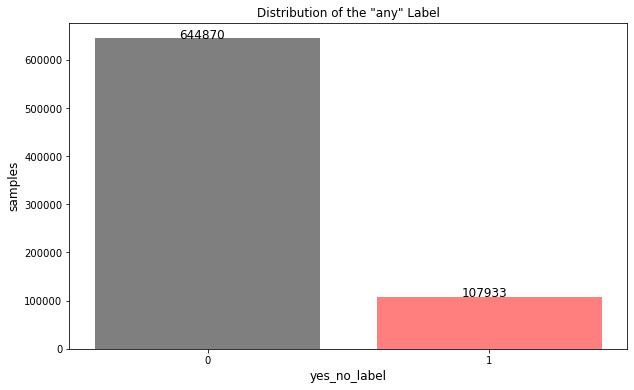

In [121]:
plt.figure(figsize = (10,6))
plt.bar(yes_no.index, yes_no.values, align='center', color = ['black','red'], alpha=0.5)
plt.xticks(yes_no.index)
plt.ylabel('samples', fontsize = 12)
plt.xlabel('yes_no_label', fontsize = 12)
plt.title('Distribution of the "any" Label', fontsize = 12)
for i, v in enumerate(yes_no.values):
    plt.text(i-0.1, v , str(v), fontsize = 12);

In [5]:
644870/107933

5.974725060917421

### *The sublabels: What kind of hemorrhage?*

In [131]:
sublabels = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']

In [76]:
sub_label_counts = []
for label in sublabels:
    count = df_meta_train['Label'][label].sum()
    sub_label_counts.append(count)
    
    

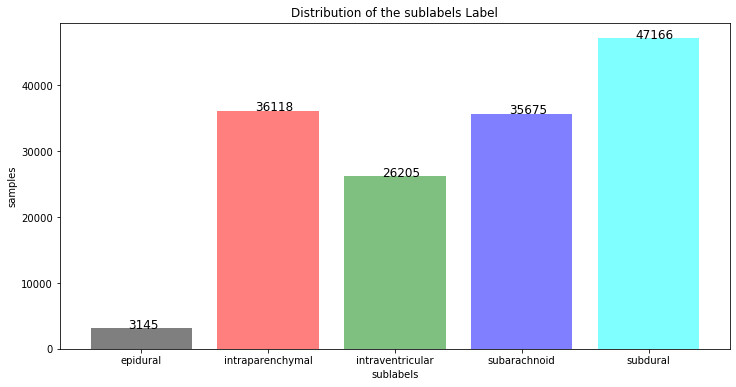

In [113]:
plt.figure(figsize = (12,6))
plt.bar(sublabels, sub_label_counts, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(sublabels)
plt.ylabel('samples', fontsize = 12)
plt.xlabel('sublabels', fontsize = 12)
plt.title('Distribution of the sublabels Label', fontsize = 12)
for i, v in enumerate(sub_label_counts):
    plt.text(i-0.1, v+0.2 , str(v), fontsize = 12)

The classes are very unbalanced.  
There are 650,000 images without hemorrhages and only 108.000 with hemorrhages.  
Of those 108.000 images, only 3,145 images show an epidural hemorrhage.

This is a problem for modeling and needs to be addressed.

<a id="the_images"></a>
## 4.  The images: DICOM, Windowing and Hounsfield Units


<a id="dicom"></a>
### 4.1 DICOM

The images are in a file format called DICOM .
A DICOM file is an image saved in the Digital Imaging and Communications in Medicine (DICOM) format. DICOM is used worldwide to store, exchange, and transmit medical images. It contains the as well as meta data containing identification data for patients so that the image is linked to a specific individual.

<div style="font-size: 10px"> 
    
DICOM, https://en.wikipedia.org/w/index.php?title=DICOM&oldid=926936249 (last visited Nov. 24, 2019).

To read the files, I need to import a library called pydicom:

<div style="font-size: 10px"> 
 
pydicom, https://pydicom.github.io/pydicom/stable/getting_started.html (last visited Nov. 24, 2019).

In [24]:
import pydicom

Let's look at a dicom file:

In [25]:
img_1 = pydicom.dcmread(path_train_data + df_meta_train.index[1]+'.dcm')

In [26]:
img_1

(0008, 0018) SOP Instance UID                    UI: ID_000039fa0
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_eeaf99e7'
(0020, 000d) Study Instance UID                  UI: ID_134d398b61
(0020, 000e) Series Instance UID                 UI: ID_5f8484c3e0
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125.000000', '-141.318451', '62.720940']
(0020, 0037) Image Orientation (Patient)         DS: ['1.000000', '0.000000', '0.000000', '0.000000', '0.968148', '-0.250380']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.488281', '0.488281']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored 

In [148]:
img_1.pixel_array

array([[-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
      

What is the size of the images?

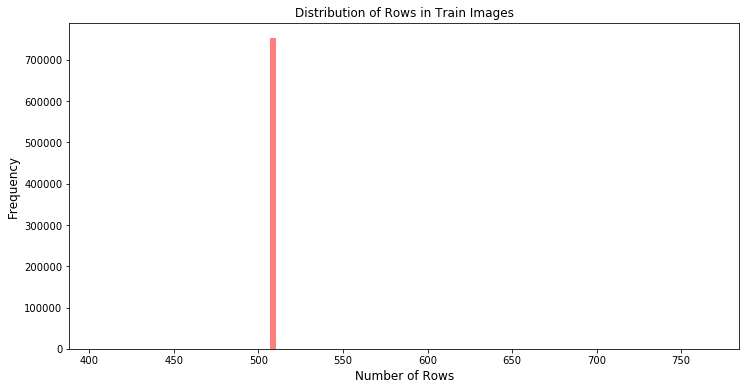

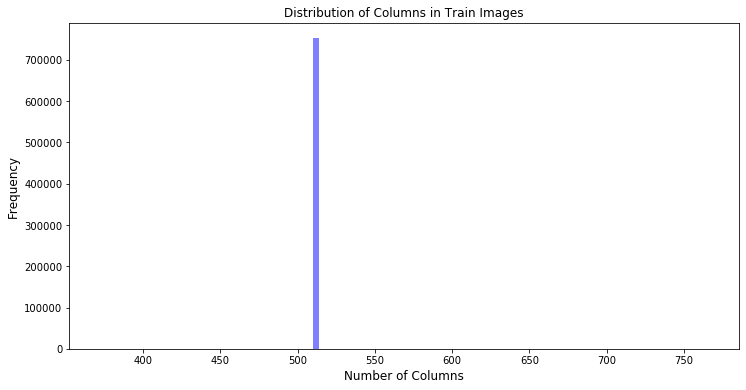

In [73]:
rows = []
columns = []

for i in range(len(os.listdir(path_train_data))):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    row= data.Rows
    col= data.Columns
    rows.append(row)
    columns.append(col)

plt.figure(figsize = (12,6))
plt.hist(rows, alpha = 0.5, color = ['r'], align = 'left', bins = 100)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Number of Rows', fontsize = 12)
plt.title('Distribution of Rows in Train Images', fontsize = 12);

plt.figure(figsize = (12,6))
plt.hist(columns, alpha = 0.5, color = ['b'], align = 'left', bins = 100)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Number of Columns', fontsize = 12)
plt.title('Distribution of Columns in Train Images', fontsize = 12);

All Images are 512x512 pixes.

Let's plot a couple of images:

In [27]:
def plot_pixel_array(data):
    figsize=(5,5)
    plt.figure(figsize=figsize)
    plt.imshow(data.pixel_array, cmap=plt.cm.bone)
    plt.show()

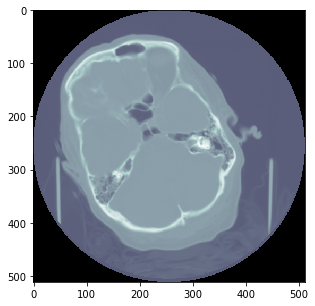

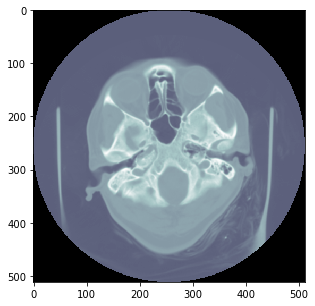

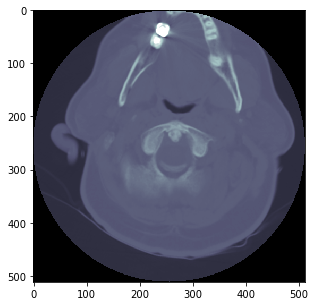

In [28]:
for i in range(3):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    plot_pixel_array(data)

There is no way we can see a Hemorrhage in these examples.
After doing some research how to visualize DICOM images, it turns out we need to "window" the image to enhance contrast for the particular tissue we are interested in. For windowing, the CT image greyscale component of an image is manipulated via the Hounsfield Units.The brightness of the image is, adjusted via the window level. The contrast is adjusted via the window width.

<div style="font-size: 10px"> 
    
CT scan, https://en.wikipedia.org/w/index.php?title=CT_scan&oldid=927086096 (last visited Nov. 24, 2019).


<a id="houndsfield_units"></a>
### 4.2 Hounsfield Units
  
In CT scans, the density of a tissue is represented using the Hounsfield scale, with water having a value of zero Hounsfield units (HU), tissues denser than water having positive values, and tissues less dense than water having negative values. 
<div style="font-size: 10px"> 
    
Hounsfield Scale, https://en.wikipedia.org/w/index.php?title=Hounsfield_scale&oldid=922804859 (last visited Nov. 24, 2019).

In [29]:
hounsfield_dict = {'Tissue': 
                   ['Bone','Liver','White matter','Grey matter','Blood','Muscle','Cerebrospinal fluid','Water','Fat','Air'],
                   'T number (HU)':['1000',"40-60",'~20-30','~37-45','40','10-40','15','0','50-100','~1000']}

In [30]:
hounsfield_df = pd.DataFrame.from_dict(hounsfield_dict)
hounsfield_df

Tissue T number (HU)
0                 Bone          1000
1                Liver         40-60
2         White matter        ~20-30
3          Grey matter        ~37-45
4                Blood            40
5               Muscle         10-40
6  Cerebrospinal fluid            15
7                Water             0
8                  Fat        50-100
9                  Air         ~1000

Let's find out the pixle value of your images:

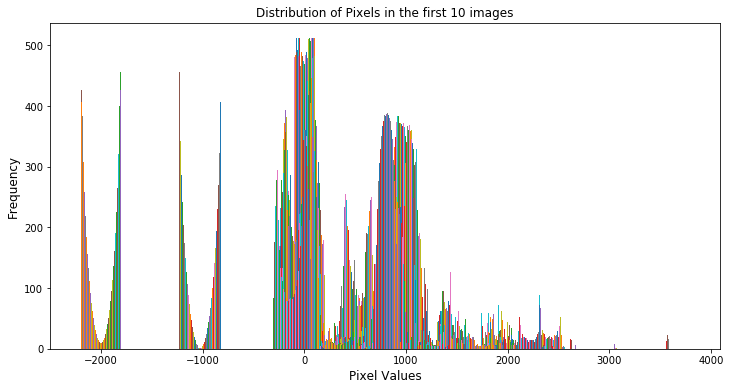

In [43]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Pixel Values', fontsize = 12)
plt.title('Distribution of Pixels in the first 10 images', fontsize = 12)
for i in range(10):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    plt.hist(data.pixel_array, align = 'left') 
    

Let's turn the images into HU. The information to do this is included in the dicom file:

__HU = pixel_value * Rescale Slope + Rescale Intercept__

Let's check rescale slope and rescaleintercept for our images:

In [32]:
slope = []
intercept = []


for i in range(len(os.listdir(path_train_data))):

    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    slope.append(int(data.RescaleSlope))
    intercept.append(int(data.RescaleIntercept))
    

***Rescale Slope***
The mean of the rescale slope is 1.0
The min value of the rescale slope is 1
The max value of the rescale slope is 1
*******
***Rescale Intercept***
The mean of the rescale intercept is -1016.4606331271262
The median of the rescale intercept is -1024.0
The min value of the rescale intercept is -1024
The max value of the rescale intercet is 1


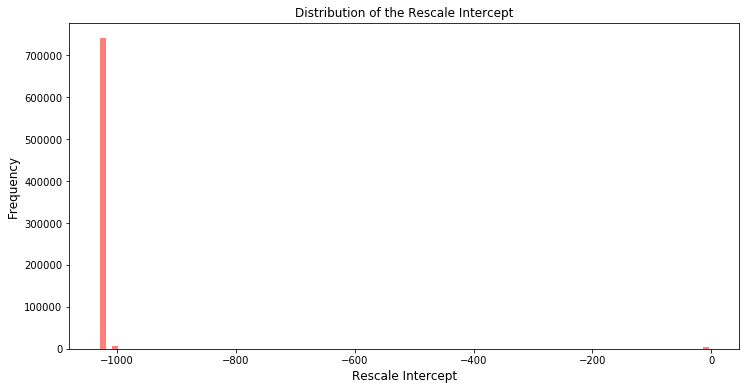

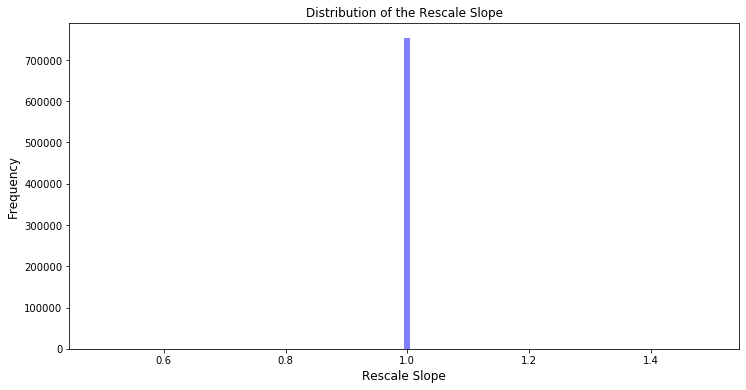

In [33]:
print('***Rescale Slope***')

print(f'The mean of the rescale slope is {np.mean(slope)}')
print(f'The min value of the rescale slope is {np.min(slope)}')
print(f'The max value of the rescale slope is {np.max(slope)}')


print('*******')

print('***Rescale Intercept***')

print(f'The mean of the rescale intercept is {np.mean(intercept)}')
print(f'The median of the rescale intercept is {np.median(intercept)}')
print(f'The min value of the rescale intercept is {np.min(intercept)}')
print(f'The max value of the rescale intercet is {np.max(intercept)}')


plt.figure(figsize = (12,6))
plt.hist(intercept, alpha = 0.5, color = ['r'], align = 'left', bins = 100)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Rescale Intercept', fontsize = 12)
plt.title('Distribution of the Rescale Intercept', fontsize = 12);

plt.figure(figsize = (12,6))
plt.hist(slope, alpha = 0.5, color = ['b'], align = 'left', bins = 100)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Rescale Slope', fontsize = 12)
plt.title('Distribution of the Rescale Slope', fontsize = 12);

Looks like the rescale slope is one for all images, and the rescale intercept is -1024 for almost all images.


As we can see in the pixel distribution above, a lot of pixels have the values -2000. This has something to do with the way the scans are recorded: Some scanners have cylindrical scanning bounds, but the output image is square. The pixels that fall outside of these bounds get the fixed value -2000. After we transform the pixel, we set these values to -1024, which after rescaling, corresponds to air. 

<div style="font-size: 10px"> 
    
Guido Zuidhof,https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial(last visited Nov. 24, 2019).  


Let's check if this is true by visulazing where those values are.  
Let's set everything -1500/-2000 to 1 and everything else to 0:

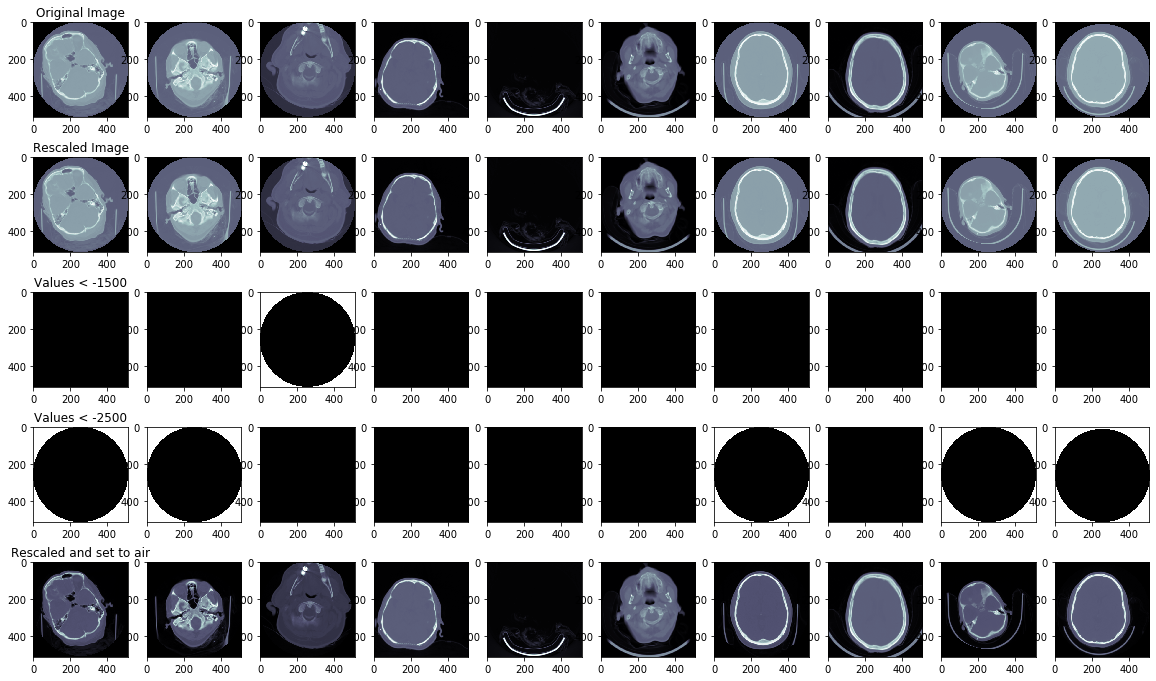

In [51]:
fig, ax = plt.subplots(5,10,figsize=(20,12))
for i in range(10):
    
    #Load images:
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    
    #Get pixel array:
    image = data.pixel_array
    
    #Rescale images using interceot and slope:
    rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
    
    # Setting Values <=-1500 & >-2500 to 1 and everything else to 0:
    minus2000 = np.where((rescaled_image <= -1500) & (rescaled_image > -2500), 1, 0)
    
    # Setting Values <-2500 to 1 and everything else to 0:
    minus3000 = np.where(rescaled_image <= -2500, 1, 0)
    
    ax[0,i].imshow(image, cmap=plt.cm.bone)
    
    ax[1,i].imshow(rescaled_image, cmap=plt.cm.bone)
   
    ax[2,i].imshow(minus2000, cmap=plt.cm.bone)
    
    ax[3,i].imshow(minus3000, cmap=plt.cm.bone)
    
    # Setting Values < -1024 to 0 (air):
    rescaled_image[rescaled_image < -1024] = -1024
    
    ax[4,i].imshow(rescaled_image, cmap=plt.cm.bone)

    ax[0,0].set_title("Original Image")
    ax[1,0].set_title("Rescaled Image")
    ax[2,0].set_title("Values < -1500")
    ax[3,0].set_title("Values < -2500")
    ax[4,0].set_title("Rescaled and set to air");

We can see that valus < -1500 have no information (shown in white). We can set those values to -1024 (air) and better align the pixel distributions of the images in the data set.

Check the distribution for the first ten images rescaled and pixel ousite scanning bounds set to air:

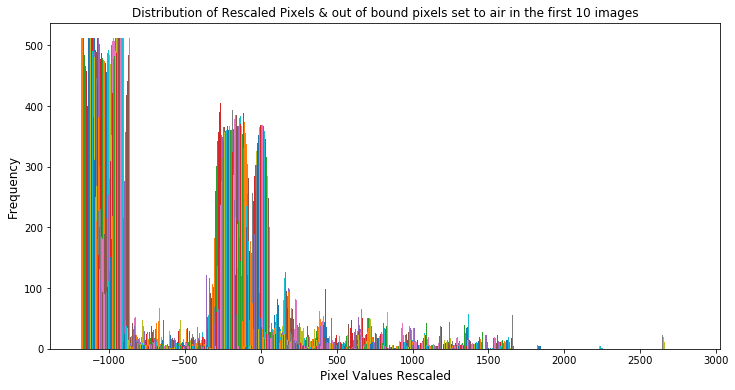

In [54]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Pixel Values Rescaled', fontsize = 12)
plt.title('Distribution of Rescaled Pixels & out of bound pixels set to air in the first 10 images', fontsize = 12)
for i in range(10):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    image = data.pixel_array
    rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    
    plt.hist(rescaled_image, align = 'left')

In [ ]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Pixel Values Rescaled', fontsize = 12)
plt.title('Distribution of Rescaled Pixels & out of bound pixels set to air in the first 10 images', fontsize = 12)
for i in range(10):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    image = data.pixel_array
    rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    
    plt.hist(rescaled_image, align = 'left')

<a id="windowing"></a>
### 4.3 Windowing
Lower-density tissues are assigned darker greys and high-density structures are assigned brighter (whiter) greys. Our eye can only detect 16 shades different shades of grey in one image. Given there are 2000 HU (-1000 to 1000), we need a change of 2000/16 = 125 HU for your eyes to be able to detect a change in density. Looking at common HU units for different structures, this is way to broad of a range. We won't be able to see important changes in the intensity to detect the hemorrhage. In order to see more detailed density changes, we have to focus on a small range of HU unites of interest to have enough shades of grey available to see the changes. This is called windowing. The HU values for each pixel (which reflect the electron density of the imaged tissue at a given location) are converted into a digital image by assigning a gray-scale intensity to each value—the higher the number, the brighter the pixel intensity. The same image data can be displayed in different window settings to allow evaluation of injury to different tissues. In general, head CT images are viewed on brain or bone windows to allow most emergency pathology to be assessed.
<div style="font-size: 10px"> 
    
Hounsfield Scale,https://www.sciencedirect.com/topics/medicine-and-dentistry/hounsfield-scale(last visited Nov. 24, 2019).  
Windowing CT, https://radiopaedia.org/articles/windowing-ct(last visited Nov. 24, 2019).  
Rescaling and Windowing, https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/109328#latest-630565(last visited Nov. 24, 2019).

In [3]:
bss_window_dict = {'Brain Windows': 
                   ['brain','subdural','soft tissues'],
                   'Window Width and Window Center(Level)':['40/60','80/200','40/380']}


In [4]:
bss_df = pd.DataFrame.from_dict(bss_window_dict)
bss_df

Brain Windows Window Width and Window Center(Level)
0         brain                                 40/60
1      subdural                                80/200
2  soft tissues                                40/380

#### *How can we 'window' the images?*

In [55]:
img_1

(0008, 0018) SOP Instance UID                    UI: ID_000039fa0
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_eeaf99e7'
(0020, 000d) Study Instance UID                  UI: ID_134d398b61
(0020, 000e) Series Instance UID                 UI: ID_5f8484c3e0
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125.000000', '-141.318451', '62.720940']
(0020, 0037) Image Orientation (Patient)         DS: ['1.000000', '0.000000', '0.000000', '0.000000', '0.968148', '-0.250380']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.488281', '0.488281']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored 

Window values are already given in the DICOM data (Window Center and Window Width).
Let's check if all the DICOM files have the same values for the window:

For some files the values are list (two times the same value), for other strings. We need a function that can deal with both:  

<div style="font-size: 10px"> 

Function adapted from Allunia: https://www.kaggle.com/allunia/rsna-ih-detection-eda(last visited Nov. 24, 2019).   
Code adapted from Richard McKinley: https://www.kaggle.com/omission/eda-view-dicom-images-with-correct-windowing(last visited Nov. 24, 2019). 

In [59]:
def get_window_value(feature):
    if type(feature) == pydicom.multival.MultiValue:
        return np.int(feature[0])
    else:
        return np.int(feature)

In [160]:
window_widths = []  
window_centers = []
for i in range(1000):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    width = get_window_value(data.WindowWidth)
    center = get_window_value(data.WindowCenter)
    window_widths.append(width)
    window_centers.append(center)
    

Plot distributions for Window Widths and window Centers for the first 1000 images:

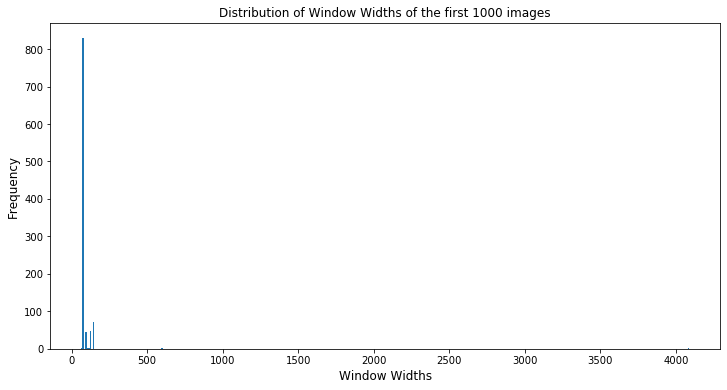

In [65]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Window Widths', fontsize = 12)
plt.title('Distribution of Window Widths of the first 1000 images', fontsize = 12)
plt.hist(window_widths, align = 'left', bins = 400);

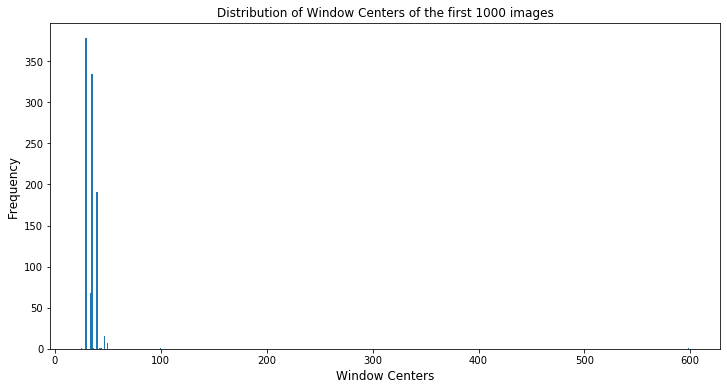

In [66]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Window Centers', fontsize = 12)
plt.title('Distribution of Window Centers of the first 1000 images', fontsize = 12)
plt.hist(window_centers, align = 'left', bins = 400);

In [161]:
np.median(window_widths)

80.0

In [169]:
np.min(window_widths)

66

In [170]:
np.max(window_widths)

4095

In [162]:
np.median(window_centers)

36.0

In [168]:
np.min(window_centers)

25

In [166]:
np.max(window_centers)

600

The images are not windowed the same and there are outliers. Let's transform the rescaled images into their windows and look at the result. The window center tells us the center of the pixel values and the width how big the window is. Pixel values therefore range from window_min = Window Center - 1/2 Window Width to window_max = Window Center + 1/2 Window Width. Values over window_max will be white and values smaller than window_min will be black.

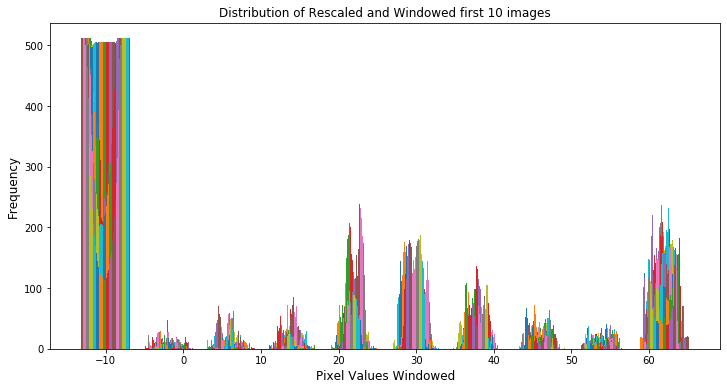

In [172]:
plt.figure(figsize = (12,6))
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Pixel Values Windowed', fontsize = 12)
plt.title('Distribution of Rescaled and Windowed first 10 images', fontsize = 12)
for i in range(10):
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    image = data.pixel_array
    rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    
    image_min = window_center - window_width//2
    image_max = window_center + window_width//2
   
    image_w = np.where(rescaled_image<image_min,image_min,rescaled_image)
    image_w = np.where(image_w>image_max, image_max, image_w)
    
    plt.hist(image_w, align = 'left')

Let's take a look at the first 10 images: Originals, Rescaled and Windowed.

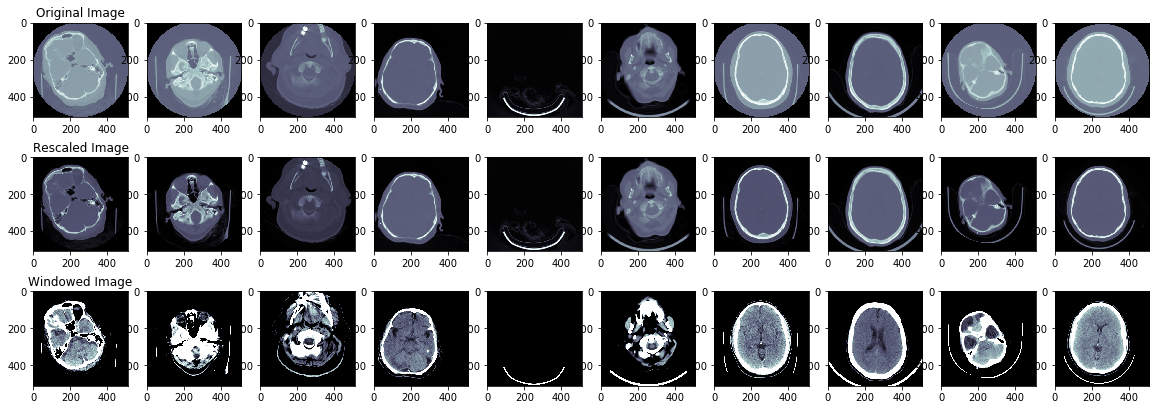

In [104]:
fig, ax = plt.subplots(3,10,figsize=(20,7))
for i in range(10):
 
    #Load images:
    data = pydicom.dcmread(path_train_data + df_meta_train.index[i]+'.dcm')
    
    #Get Window Values
    window_width = get_window_value(data.WindowWidth)
    window_center = get_window_value(data.WindowCenter)
    
    #Get pixel array:
    image = data.pixel_array
    
    #Rescale images using interceot and slope:
    rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    
    image_min = window_center - window_width//2
    image_max = window_center + window_width//2
   
    image_w = np.where(rescaled_image<image_min,image_min,rescaled_image)
    image_w = np.where(image_w>image_max, image_max, image_w)
 
    
    ax[0,i].imshow(image, cmap=plt.cm.bone) 
    ax[1,i].imshow(rescaled_image, cmap=plt.cm.bone)
    ax[2,i].imshow(image_w, cmap=plt.cm.bone)
    
   

    ax[0,0].set_title("Original Image")
    ax[1,0].set_title("Rescaled Image")
    ax[2,0].set_title("Windowed Image");

Let's try to look at images with different labels:

In [142]:
epidural = df_meta_train[(df_meta_train['Label']['epidural'] == 1)][:10]

intraparenchymal = df_meta_train[(df_meta_train['Label']['intraparenchymal'] == 1)][:10]

intraventricular = df_meta_train[(df_meta_train['Label']['intraventricular'] == 1)][:10]

subarachnoid = df_meta_train[(df_meta_train['Label']['subarachnoid'] == 1)][:10]

subdural = df_meta_train[(df_meta_train['Label']['subdural'] == 1)][:10]



In [151]:
def plot_sub_type(subtype_df, sublabel_name):
    fig, ax = plt.subplots(1,5,figsize=(20,3))
    for i in range(5):
 
        #Load images:
        data = pydicom.dcmread(path_train_data + subtype_df.index[i]+'.dcm')

        #Get Window Values

        window_width = get_window_value(data.WindowWidth)
        window_center = get_window_value(data.WindowCenter)

        #Get pixel array:
        image = data.pixel_array

        #Rescale images using interceot and slope:
        rescaled_image = image * data.RescaleSlope + data.RescaleIntercept
        rescaled_image[rescaled_image < -1024] = -1024

        image_min = window_center - window_width//2
        image_max = window_center + window_width//2

        image_w = np.where(rescaled_image<image_min,image_min,rescaled_image)
        image_w = np.where(image_w>image_max, image_max, image_w)


        ax[i].imshow(image_w, cmap=plt.cm.bone) 




        ax[0].set_title("Images of " +sublabel_name+" Hemorerhage");

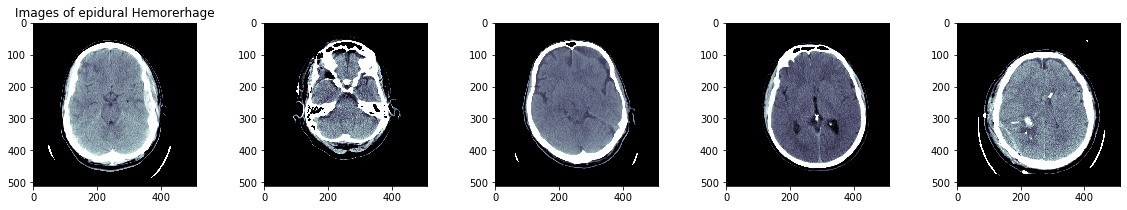

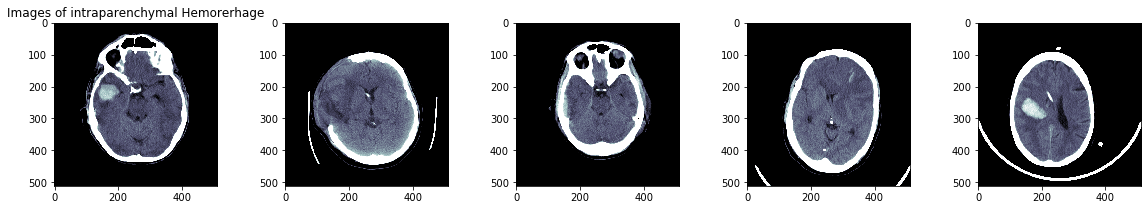

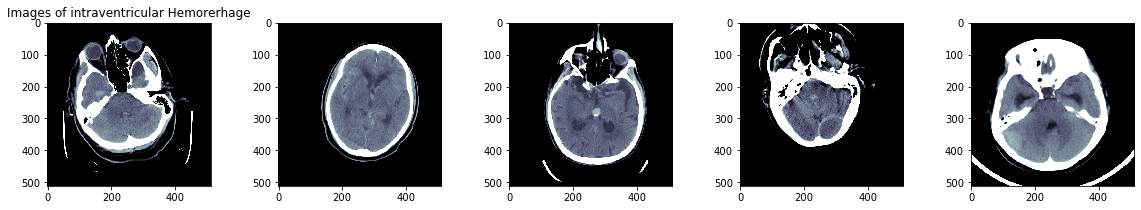

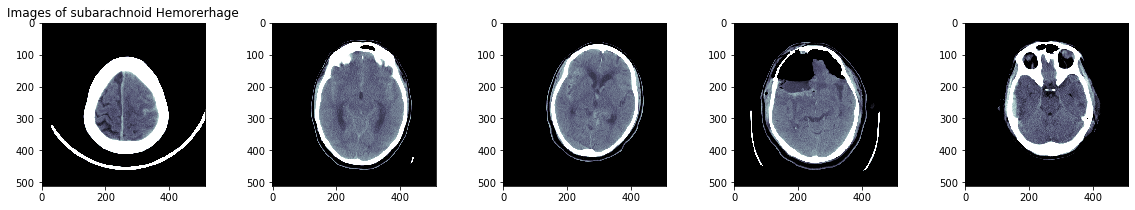

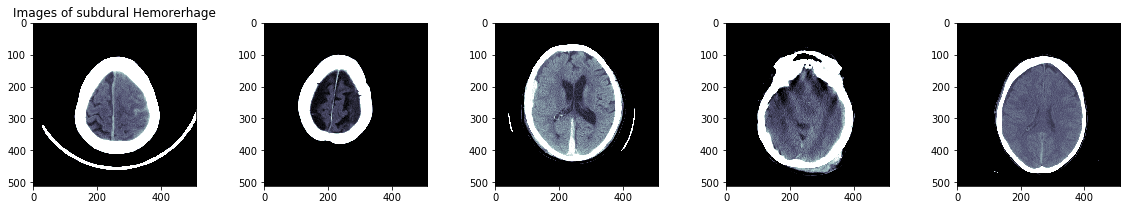

In [152]:
for i in range(len(sublabels_dfs)):
    plot_sub_type(sublabels_dfs[i], sublabels[i]);
    

The hemorrhages are very hard to see. Let's hope Neural Networks are better in detecing the bleedings.

I am not sure if we need Windowing to train the Neuronal Network, since computers don't have probems whith recognizing the different pixel values. 

Windowing in the NN should be broader, eg. min = 0 max = 100.
In many Kernels, people use all the brain windows (bss window) stacked for modeling.

<a id="modeling"></a>
## 5. Modeling

<a id="preprocessing"></a>
### 5.1 Preprocessing

From the EDA we learned that the images must undergo a couple of transformations before they ca be properly visulized. All of this preprocessing must be performed before the images are shown to the model. I am going to use a preprocessor class to handle the transformations.
Functions of Preprocessor: 
- reads dicom files and raw pixle array
- rescales to hounsfield units (see EDA)
- windowing to appropriate window (see EDA)


Because the data set is very big, memory space might not big enough to load all the data for the model at once.
The data generator will generate the data needed for modeling on multiple cores in real time and feed it into the model right after creation. I am using a block post from stanford.edu to build the data generator class.




<div style="font-size: 12px"> 



Code adapted from: https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly(last visited Nov. 24, 2019).  
Code adapted from Allunia: https://www.kaggle.com/allunia/rsna-ih-detection-eda(last visited Nov. 24, 2019).   


__Preprocessor Class:__

In [ ]:
# Function rescale Pixel Array to HU unites
def rescale_image(dataset):
    image = dataset.pixel_array
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    return rescaled_image

# Function for windowing: getting rid of informations in the image we don't need (CT-tube signals,
# bones and tissue we are not interested in.)
def windowing(hu_image, image_min, image_max):
    hu_image = np.clip(hu_image, hu_min_value, hu_max_value)
    hu_image = np.where(hu_image<hu_min_value,hu_min_value, hu_image)
    hu_image = np.where(hu_image>hu_max_value, hu_max_value, hu_image)
    return hu_image

class Preprocessor:    
    
    def __init__(self, path,hu_min_value, hu_max_value, augment=False):
        self.path = path
        self.nn_input_shape = (512, 512) 
        self.hu_min_value = hu_min_value
        self.hu_max_value = hu_max_value
        self.augment = augment
        
    # Load dicom file.
    def load_dicom_dataset(self, filename):
        dataset = pydicom.dcmread(self.path + filename)
        return dataset
    
    # Rescale and windowing function put together.
    def get_hounsfield_window(self, dataset, min_value, max_value):
        
        hu_image = rescale_image(dataset)
        windowed_image = windowing(hu_image, min_value, max_value)
 
        return windowed_image
    
        

    # Resize the image to the input shape of the CNN.
    def resize(self, image):
        image = resize(image, self.nn_input_shape)
        return image

    # Augementation Function: Crop, rotate and flip horizontally
    def augment_img(self, image): 
        augment_img = iaa.Sequential([
            iaa.Crop(keep_size=True, percent=(0.01, 0.05), sample_independently=False),
            iaa.Affine(rotate=(-10, 10)),
            iaa.Fliplr(0.5)])
        image_aug = augment_img.augment_image(image)
        return image_aug
    
    def fill_channels(self, image):
        filled_image = np.stack((image,)*3, axis=-1)
        return filled_image
    
    def preprocess(self, identifier):
        filename = identifier +  ".dcm"
        dataset = self.load_dicom_dataset(filename)
        windowed_image = self.get_hounsfield_window(dataset, self.hu_min_value, self.hu_max_value)
        image = self.resize(windowed_image)
        if self.augment:
            image = self.augment_img(image)
        image = self.fill_channels(image)
        return image
    
    def normalize(self, image):
        return (image - self.hu_min_value)/(self.hu_max_value-self.hu_min_value) * 0.5


In [ ]:
class DataLoader(Sequence):
    
    def __init__(self, dataframe,
                 preprocessor,
                 batch_size,
                 shuffle,
                 num_classes=6,
                 steps=None):
        
        self.preprocessor = preprocessor
        self.data_ids = dataframe.index.values
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.input_shape = (512, 512)
        self.num_classes = num_classes
        self.current_epoch=0
        
        self.steps=steps
        if self.steps is not None:
            self.steps = np.round(self.steps/3) * 3
            self.oversample()

    def oversample(self):
        part = np.int(self.steps/3 * self.batch_size)
        zero_ids = np.random.choice(self.dataframe.loc[self.dataframe["any"] == 0].index.values, size=2*part, replace=False)
        hot_ids = np.random.choice(self.dataframe.loc[self.dataframe["any"] == 1].index.values, size=1*part, replace=False)
        self.data_ids = list(set(zero_ids).union(hot_ids))
        np.random.shuffle(self.data_ids)

    # defines the number of steps per epoch
    def __len__(self):
        if self.steps is None:
            return np.int(np.ceil(len(self.data_ids) / np.float(self.batch_size)))
        else:
            return 3*np.int(self.steps/3) 
    
    # at the end of an epoch: 
    def on_epoch_end(self):
        # if steps is None and shuffle is true:
        if self.steps is None:
            self.data_ids = self.dataframe.index.values
            if self.shuffle:
                np.random.shuffle(self.data_ids)
        else:
            self.oversample()
        self.current_epoch += 1
    
    # should return a batch of images
    def __getitem__(self, item):
        # select the ids of the current batch
        current_ids = self.data_ids[item*self.batch_size:(item+1)*self.batch_size]
        X, y = self.__generate_batch(current_ids)
        return X, y
    
    
    
    # collect the preprocessed images and targets of one batch
    def __generate_batch(self, current_ids):
        X = np.empty((self.batch_size, *self.input_shape, 3))
        y = np.empty((self.batch_size, self.num_classes))
        for idx, ident in enumerate(current_ids):
            # Store sample
            image = self.preprocessor.preprocess(ident)
            X[idx] = self.preprocessor.normalize(image)
            # Store class
            y[idx] = self.__get_target(ident)
        return X, y
    
    # extract the targets of one image id:
    def __get_target(self, ident):
        targets = self.dataframe.loc[ident].values
        return targets

<a id="models_overview"></a>
### 5.2 Models  Overview
__For details on the models see the corresponding notebooks in the code section of this respository.__

I tried a variety of different models, evaluating their performance using the score the predictions received on Kaggle.
All models can be found in this repo under /code/models.

Here is a n overview of the best performing models:

In [9]:
models_df = pd.read_csv('../data/output/Capstone model overview - Sheet1.csv')
models_df.set_index('Name')

Model 1  \
Name                                                       
Model                   2 x (Conv2D + MaxPool) + 2 Dense   
Augemntation                                        Flip   
Windowing                                  Single window   
Class Balancing                  Oversampling 2 positive   
Loss Function                          Weighted Log Loss   
Regularization       Drop Out Layers 0.5, Early Stopping   
Number of Epoch run                                   14   
Time Run (h)                                           3   
Test Loss                                         0.3614   
Validation Loss                                   0.3276   
Kaggle Score                                     0.50632   
Kaggle Rank                               410/1345 (31%)   

                                                               Model 4  \
Name                                                                     
Model                InceptionResNetV2, trainable=True             ...   
Augemntation                                                Flip, Crop   
Windowing                                                   BSS window   
Class Balancing                                Oversampling 3 positive   
Loss Function                                      Binary_crossentropy   
Regularization                                     Drop Out Layers 0.3   
Number of Epoch run                                                  3   
Time Run (h)                                                      10.5   
Test Loss                                                       0.1031   
Validation Loss                                                 0.0868   
Kaggle Score                                                   0.42592   
Kaggle Rank                                             405/1354 (30%)   

                                                 Model 10  \
Name                                                        
Model                InceptionV3, trainable=False           
Augemntation                                            -   
Windowing                                      BSS window   
Class Balancing                 Oversampling 1,5 positive   
Loss Function                            Weighted LogLoss   
Regularization                               Drop out 0.2   
Number of Epoch run                                     5   
Time Run (h)                                            6   
Test Loss                                          0.0823   
Validation Loss                                    0.0765   
Kaggle Score                                      0.39061   
Kaggle Rank                                403/1345 (30%)   

                                                               Model 2  
Name                                                                    
Model                VGG 16 , trainable = False                         
Augemntation                                                      Flip  
Windowing                                                Single window  
Class Balancing                                Oversampling 2 positive  
Loss Function                                      Binary_crossentropy  
Regularization                     Early Stopping, Drop Out Layers 0.3  
Number of Epoch run                                                 50  
Time Run (h)                                                         3  
Test Loss                                                        0.322  
Validation Loss                                                 0.3136  
Kaggle Score                                                   0.52307  
Kaggle Rank                                             410/1345 (31%)

<a id="results"></a>
### 5.3 Results

__Some learnings from all the models I tried:__

What worked:
- Pretrained models: Good results, runtime is shorter
- BSS window: Stacking three images with different, for blood and brain tissue relevant windows on top of each other
- Oversampling of the "Any" Class

What did not work:
- Multihead models: Model with two outputs. Softmax for the "Any" label and sigmoid for the sublabels

__The best model:__  
For the model with the best performance, I used Google's Inception V3 model as backbone with one additional Dense Layer, Global Average Pooling and Dropouts.
This model has a validation loss of 0.0765, a test loss of 0.0823 (loss function: Weighted Log Loss) and it scored 0.39061 on Kaggle, and being in the top 30% of the leader board.
<img src="attachment:subtypes.png" width="500">